In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.metrics import classification_report , confusion_matrix  , accuracy_score
from sklearn.model_selection import GridSearchCV

# 1. Data Preparation

In [115]:
#load the dataset
data = pd.read_excel('heart_disease.xlsx' , sheet_name='Heart_disease')

In [116]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


# 2. Exploratory Data Analysis (EDA)

In [117]:
print(data.dtypes)

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object


In [118]:
print(data.isnull().sum())

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


In [119]:
print(data.describe())

              age    trestbps        chol      thalch     oldpeak         num
count  908.000000  908.000000  908.000000  908.000000  846.000000  908.000000
mean    53.791850  133.430617  201.484581  135.957048    0.891253    1.008811
std      9.158031   20.401608  112.097949   26.804929    1.093875    1.144436
min     29.000000    0.000000    0.000000   60.000000   -2.600000    0.000000
25%     47.750000  120.000000  176.750000  118.000000    0.000000    0.000000
50%     54.000000  130.000000  224.000000  138.000000    0.500000    1.000000
75%     60.000000  144.000000  270.000000  156.000000    1.500000    2.000000
max     77.000000  200.000000  603.000000  202.000000    6.200000    4.000000


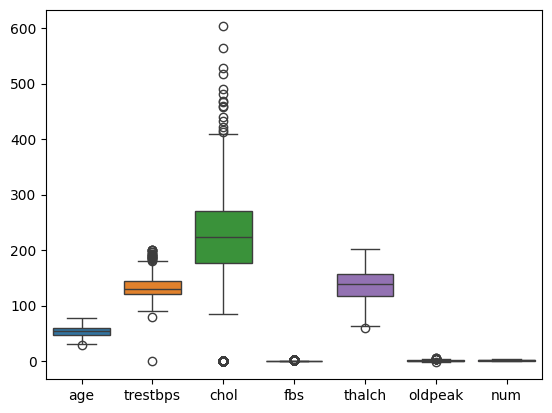

In [120]:
sns.boxplot(data=data)
plt.show()

In [121]:
def remove_outliers(data, threshold=4):
    clean = data.copy()
    for column in clean.select_dtypes(include=[np.number]).columns:
        z_scores = (clean[column] - clean[column].mean()) / clean[column].std()
        clean = clean[np.abs(z_scores) <= threshold]
    return clean

# Remove outliers using z score
data = remove_outliers(data)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,51,Male,asymptomatic,110,0,True,normal,92,False,0.0,flat,fixed defect,4
902,62,Male,asymptomatic,160,254,True,st-t abnormality,108,True,3.0,flat,normal,4
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4


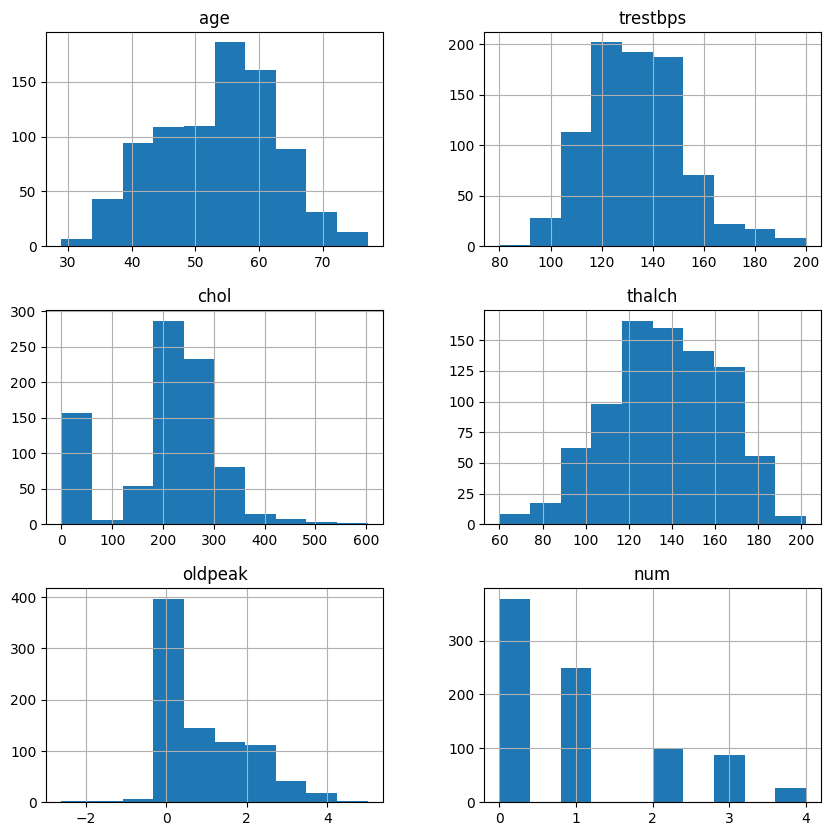

In [122]:
data.hist(figsize=(10, 10))
plt.show()

In [123]:
data['num'].unique()

array([0, 1, 2, 3, 4])

In [124]:
data['exang'].unique()

array([False, True, 'FALSE'], dtype=object)

In [125]:
# replace values (some true and false value are worng in this columns so replaced that)
data.replace({'TURE': True, 'FALSE': False}, inplace=True)
data = data.infer_objects()  # Ensure correct type inference

C:\Users\sanke\AppData\Local\Temp\ipykernel_17656\2555968121.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'TURE': True, 'FALSE': False}, inplace=True)


# 3. Feature Engineering

In [126]:
#convert bool to integer
data['fbs'] = data['fbs'].astype(int)

In [127]:
#convert bool to integer
data['exang'] = data['exang'].astype(int)

In [128]:
# encoded the categorical data
encoder = LabelEncoder()

data['sex']= encoder.fit_transform(data['sex'])
data['cp']= encoder.fit_transform(data['cp'])
data['restecg']= encoder.fit_transform(data['restecg'])
data['slope']= encoder.fit_transform(data['slope'])
data['thal']= encoder.fit_transform(data['thal'])

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,0,2.3,0,0,0
1,41,1,1,135,203,0,1,132,0,0.0,1,0,0
2,57,1,0,140,192,0,1,148,0,0.4,1,0,0
3,52,1,3,118,186,0,0,190,0,0.0,1,0,0
4,57,1,0,110,201,0,1,126,1,1.5,1,0,0


In [129]:
data['oldpeak'] = data['oldpeak'].fillna(data['oldpeak'].mean())

In [130]:
print(data.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64


# 4. Decision Tree Classification

In [131]:
#Rename 'num' to 'target' for clarity
data.rename(columns={'num':'target'}, inplace =True)

In [132]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,0
1,41,1,1,135,203,0,1,132,0,0.0,1,0,0
2,57,1,0,140,192,0,1,148,0,0.4,1,0,0
3,52,1,3,118,186,0,0,190,0,0.0,1,0,0
4,57,1,0,110,201,0,1,126,1,1.5,1,0,0


In [133]:
#split the dataset into fatures (X) and Target (Y)
X=data.drop(columns=['target']) #features
Y = data['target'] #Target

In [135]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3 , random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((590, 12), (253, 12), (590,), (253,))

In [138]:
model = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, criterion='entropy')
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10)

In [140]:
Y_pred = model.predict(X_test) 
correct_predictions = (Y_pred == Y_test).sum()
total_predictions = len(Y_test)
accuracy = correct_predictions / total_predictions

In [141]:
print(f"\nAccuracy:{accuracy:.2f}")


Accuracy:0.60


In [147]:
report = classification_report(Y_test, Y_pred, zero_division=0)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.88      0.81       117
           1       0.49      0.65      0.56        71
           2       0.12      0.07      0.09        27
           3       0.25      0.03      0.06        29
           4       0.00      0.00      0.00         9

    accuracy                           0.60       253
   macro avg       0.32      0.33      0.30       253
weighted avg       0.52      0.60      0.55       253



In [149]:
print("\nCConfusion Matrix:\n", confusion_matrix(Y_test, Y_pred))


CConfusion Matrix:
 [[103  12   2   0   0]
 [ 20  46   5   0   0]
 [  7  17   2   1   0]
 [  7  15   6   1   0]
 [  1   4   2   2   0]]


In [153]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth =None, ccp_alpha = 0.03)
model.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.03, criterion='entropy')

In [154]:
path = model.cost_complexity_pruning_path(X_train,Y_train)

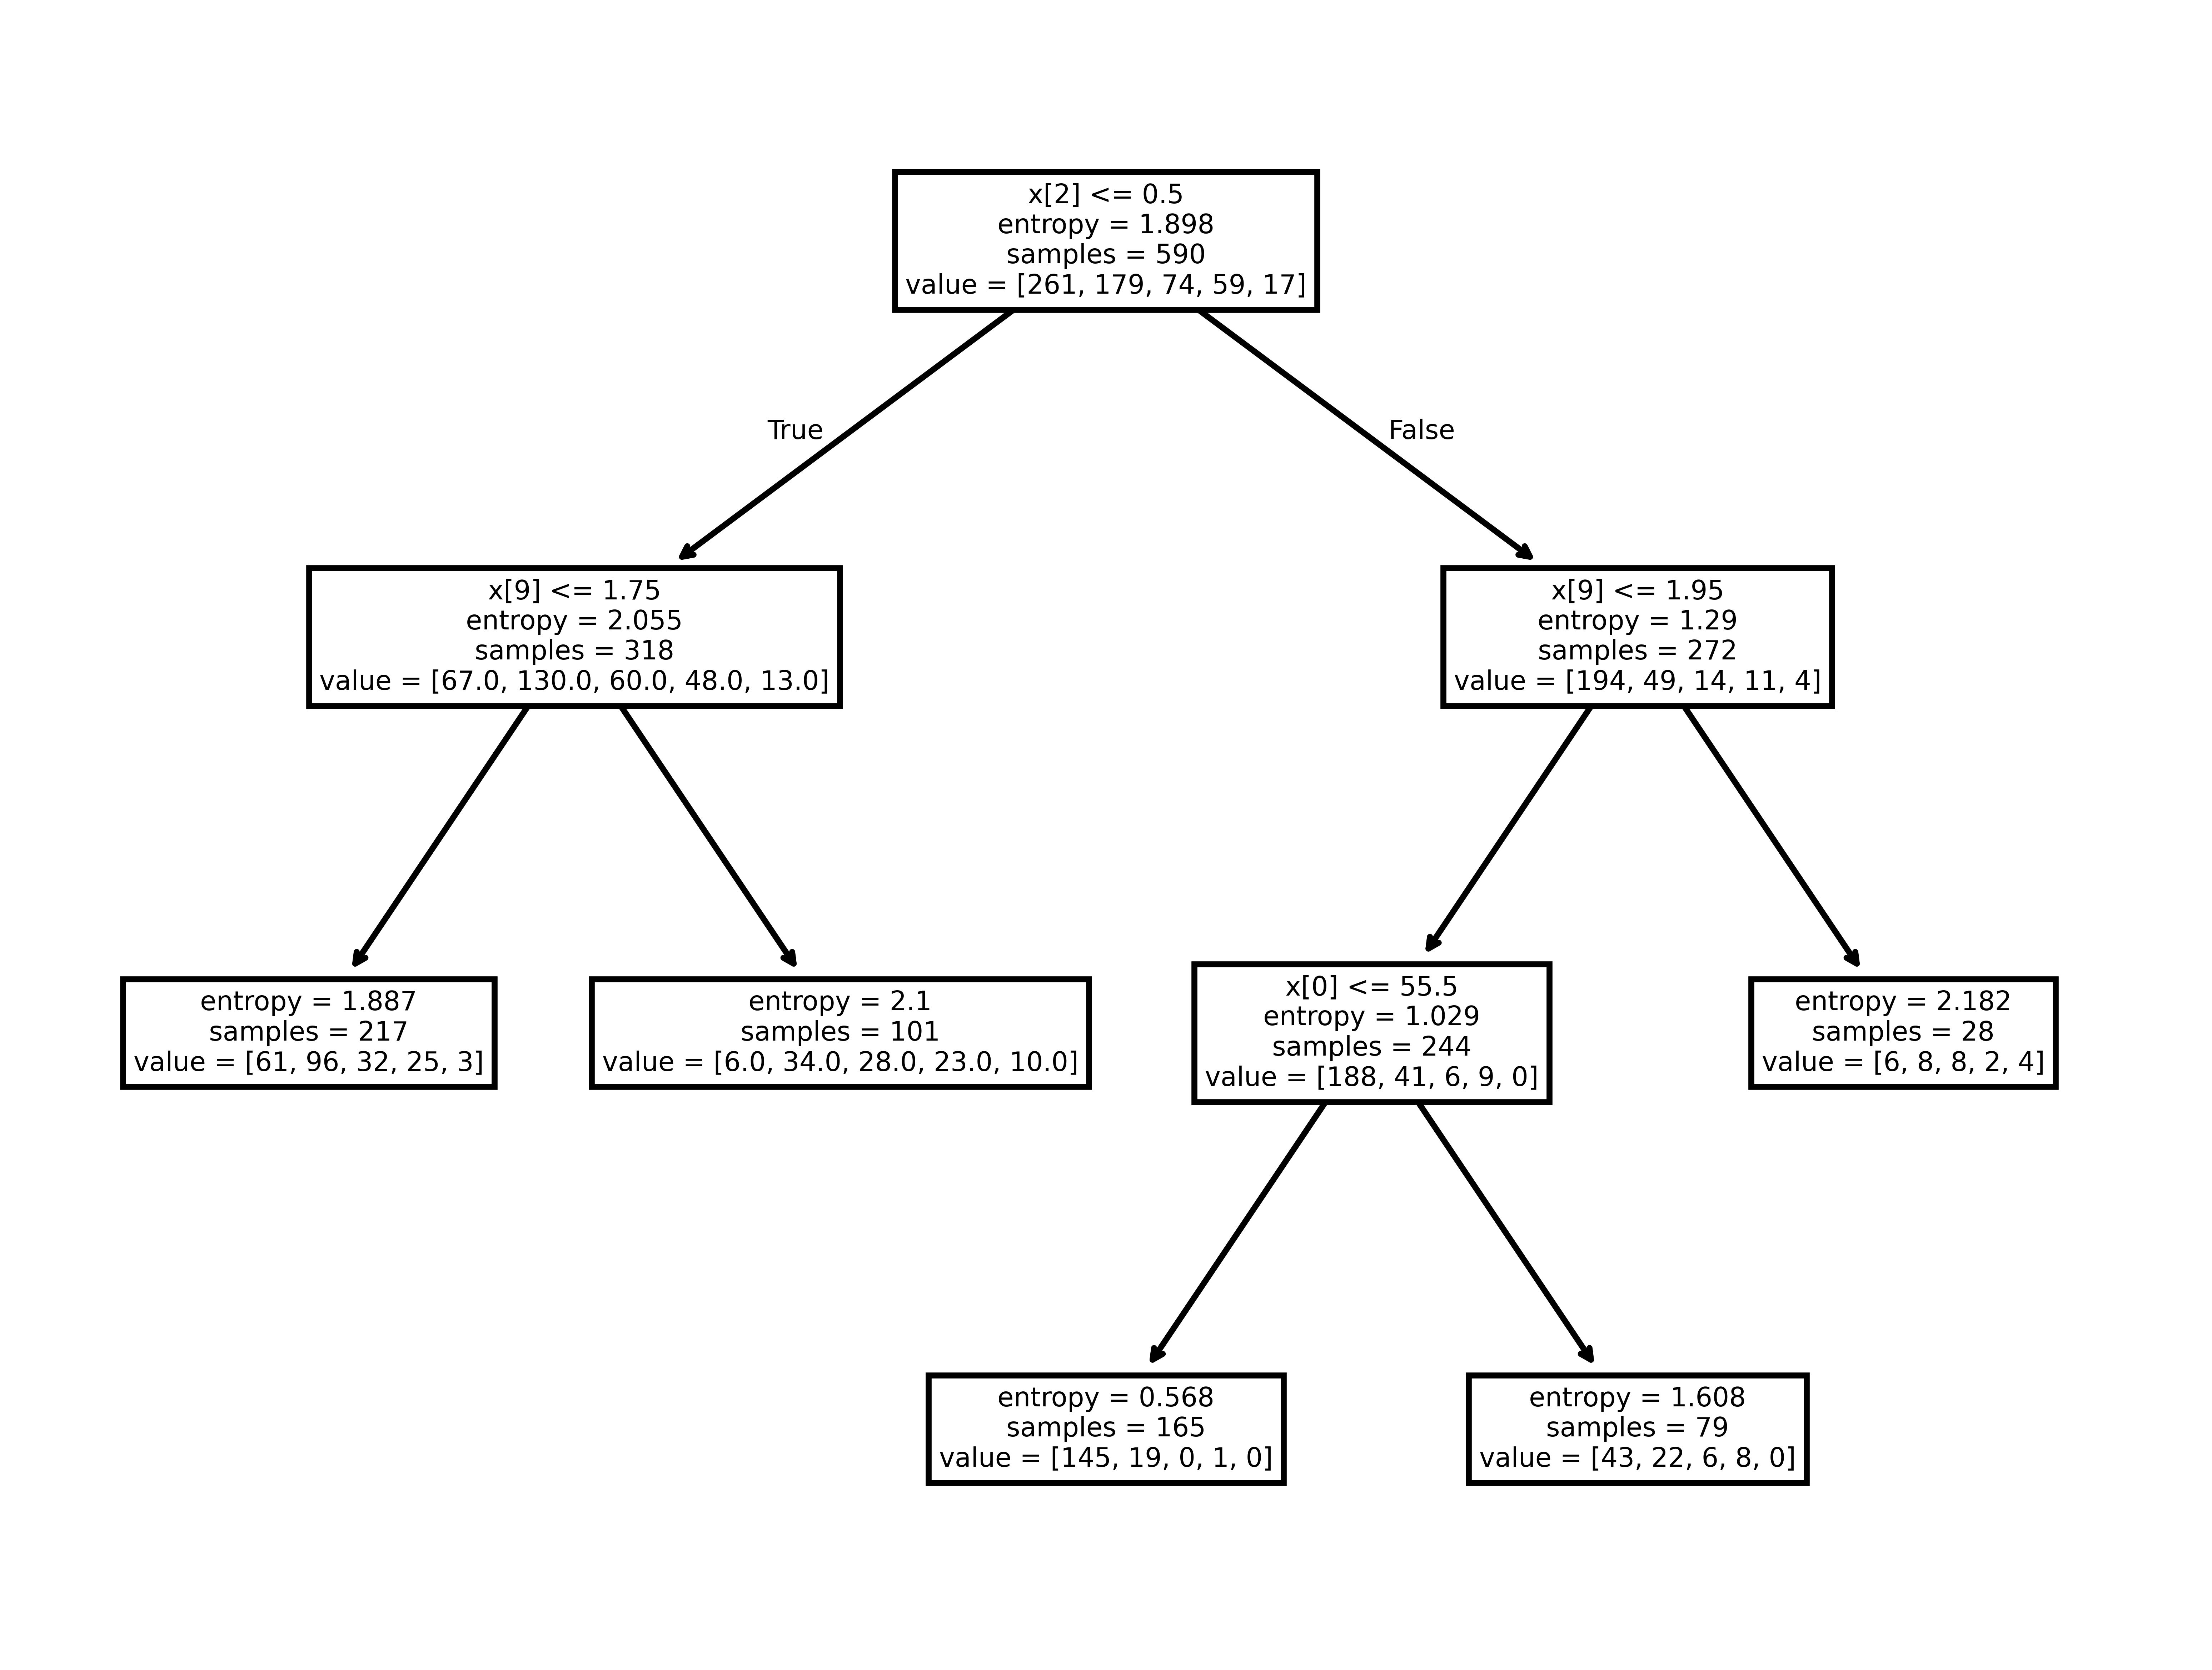

In [155]:
plt.figure(dpi=1200)
tree.plot_tree(model);

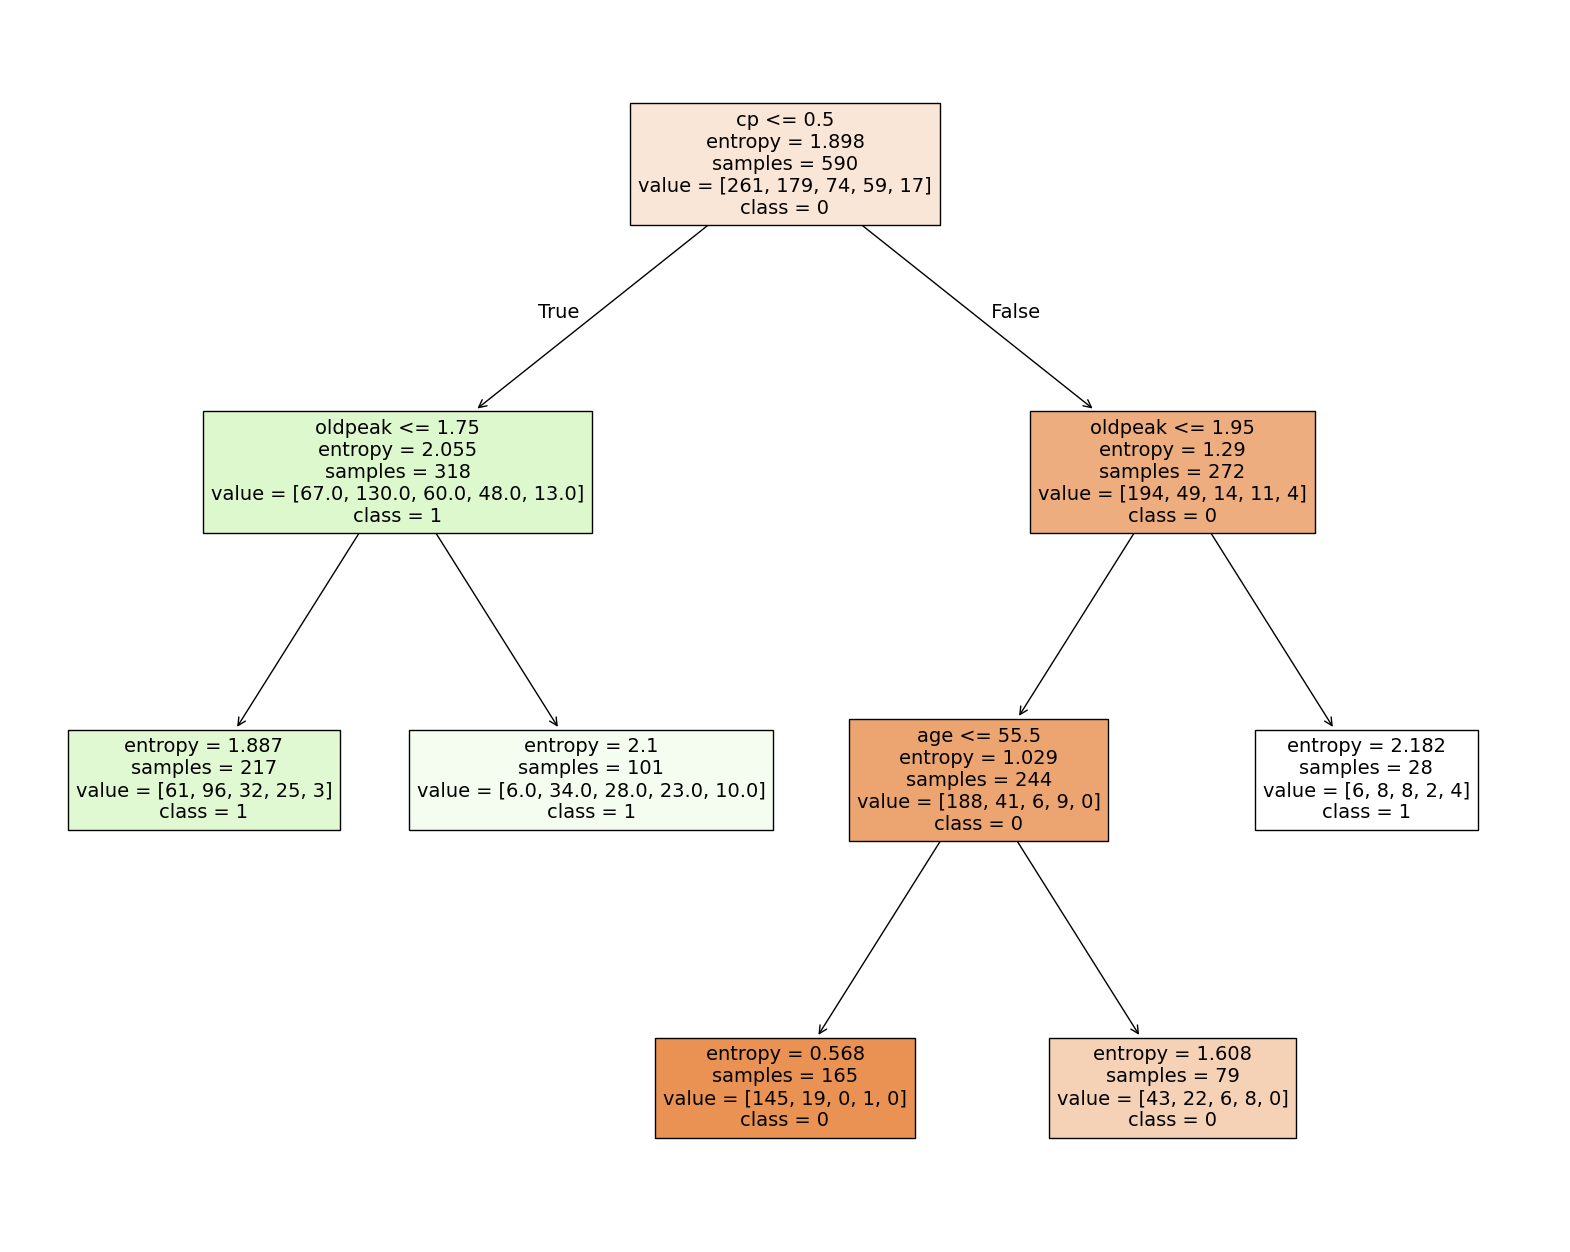

In [156]:
f_name = ['age','sex','cp','trestbps','chol','fbs','restecg','thalch','exang','oldpeak','slope','thal'] #feature names
c_name = ['0','1','2','3', '4'] #class

#fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi=300)
plt.figure(figsize = (20,16))
plot_tree(model,
          feature_names = f_name,
          class_names = c_name,
          filled = True)

plt.show()

In [160]:
#Building Decision Tree CLassifier (CART) using gini Criteria
modelg = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, criterion='gini')  # using gini
modelg.fit(X_train,Y_train)
yhat_train = modelg.predict(X_train)

In [167]:
cm = confusion_matrix(Y_train,yhat_train) # on training
cm

array([[230,  26,   3,   2,   0],
       [ 58, 107,   9,   5,   0],
       [ 10,  32,  25,   7,   0],
       [ 13,  29,   5,  12,   0],
       [  3,   7,   5,   2,   0]])

In [169]:
print(classification_report(Y_train,yhat_train,zero_division=1))

              precision    recall  f1-score   support

           0       0.73      0.88      0.80       261
           1       0.53      0.60      0.56       179
           2       0.53      0.34      0.41        74
           3       0.43      0.20      0.28        59
           4       1.00      0.00      0.00        17

    accuracy                           0.63       590
   macro avg       0.65      0.40      0.41       590
weighted avg       0.62      0.63      0.60       590



In [171]:
yhat_test = modelg.predict(X_test) # on testing
cm = confusion_matrix(Y_test,yhat_test)
cm

array([[97, 15,  3,  2,  0],
       [19, 40,  8,  4,  0],
       [ 6, 14,  3,  4,  0],
       [ 6, 18,  5,  0,  0],
       [ 1,  4,  1,  3,  0]])

In [173]:
print(classification_report(Y_test,yhat_test,zero_division=1))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79       117
           1       0.44      0.56      0.49        71
           2       0.15      0.11      0.13        27
           3       0.00      0.00      0.00        29
           4       1.00      0.00      0.00         9

    accuracy                           0.55       253
   macro avg       0.47      0.30      0.28       253
weighted avg       0.52      0.55      0.52       253



# 5. Hyperparameter Tuning

In [193]:
tree = DecisionTreeClassifier()  
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2,4, 5, 10],
    'min_samples_leaf': [1, 6,8,10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [1, 6, 8, 10],
                         'min_samples_split': [2, 4, 5, 10]},
             scoring='accuracy')

In [194]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [195]:
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)
print("Accuracy after tuning:", accuracy_score(Y_test, y_pred_tuned))
print("Classification Report after tuning:\n", classification_report(Y_test, y_pred_tuned))

Accuracy after tuning: 0.5533596837944664
Classification Report after tuning:
               precision    recall  f1-score   support

           0       0.75      0.83      0.79       117
           1       0.44      0.56      0.49        71
           2       0.15      0.11      0.13        27
           3       0.00      0.00      0.00        29
           4       0.00      0.00      0.00         9

    accuracy                           0.55       253
   macro avg       0.27      0.30      0.28       253
weighted avg       0.49      0.55      0.52       253



C:\Users\sanke\anaconda3\envs\notebook\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sanke\anaconda3\envs\notebook\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sanke\anaconda3\envs\notebook\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

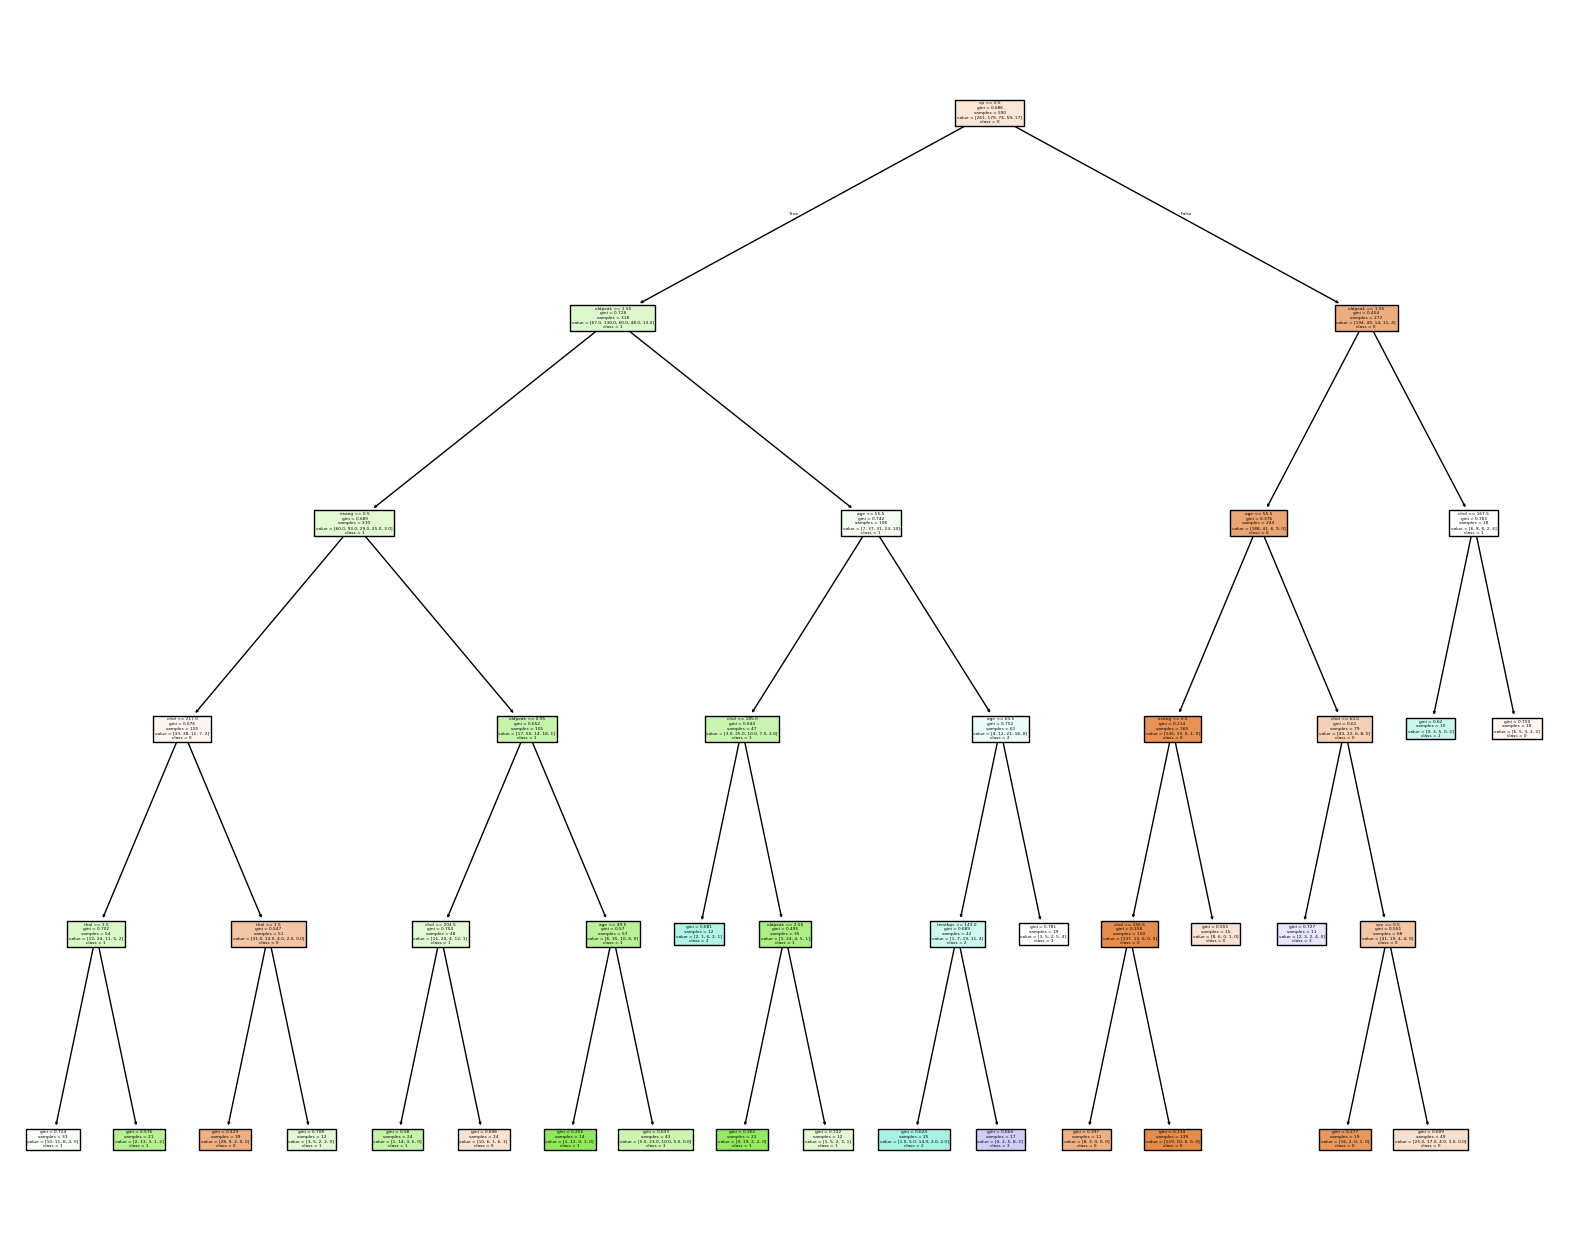

In [196]:
fn=['age','sex','cp','trestbps','chol','fbs','restecg','thalch','exang','oldpeak','slope','thal']
cn=['0','1','2','3', '4'] 

plt.figure(figsize = (20,16))
plot_tree(best_model,
          feature_names = fn,
          class_names = cn,
          filled = True)

plt.show()

# Interview Questions:

In [ ]:
#1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

In [ ]:
#max_depth: This limits the maximum depth of the tree. A deeper tree can model more complex patterns but increases the risk of overfitting.
#Setting it too low might lead to underfitting because the tree can't capture enough details.

In [ ]:
#min_samples_split: This is the minimum number of samples required to split a node. Increasing this value helps to control overfitting by making the 
#tree less likely to grow deep, as splits will require more data.

In [ ]:
#min_samples_leaf: This specifies the minimum number of samples required at a leaf node. Higher values can simplify the tree and reduce overfitting, 
#while lower values allow for more detailed splits but may overfit on small data.

In [ ]:
#criterion: This determines the function used to measure the quality of splits, like gini for Gini impurity or entropy for information gain in 
#classification tasks. Gini is computationally faster, while entropy may give better splits in some cases.

In [ ]:
#max_features: This limits the number of features considered for a split. It helps reduce overfitting and can improve generalization by making the 
#tree less dependent on specific features.

In [ ]:
#2. What is the difference between the Label encoding and One-hot encoding?

In [ ]:
#Label encoding and one-hot encoding are both techniques for converting categorical data into numerical values for machine learning

In [ ]:
#Label Encoding assigns a unique numeric value to each category ex. red = 0, blue =1,green =2

In [ ]:
# One-Hot Encoding creates separate binary columns for each category ex. red = 1,0,0  , blue = 0,1,0 , green = 0,0,1